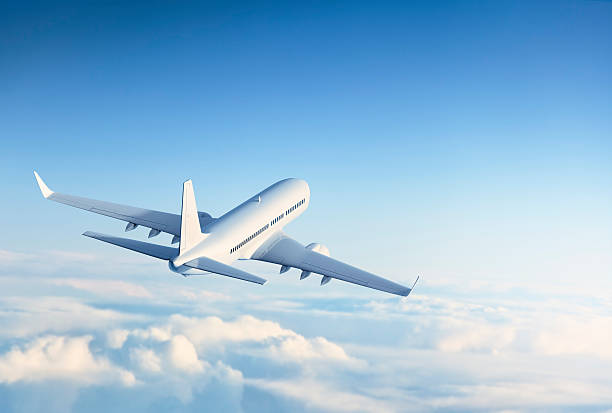

# This project is to analyze the global air passenger traffic at ZOK Airport


#### I will follow 5 step to disect the provided data:
#### 1. Load data & libraries
#### 2. Data Cleaning
#### 3. Vizualization
#### 4. Analyze the result & different confounding factors
#### 5. Conclusion


## 1. Load data & libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
import io
import plotly as pl
import plotly_express as px
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [3]:
### installing plotly_express as it was giving error in the previous step

!pip install plotly_express

In [5]:
### installing xgboost as it was giving error in the previous step

! python3 -m pip install xgboost

     |████████████████████████████████| 1.8 MB 3.4 MB/s eta 0:00:01


In [8]:
dt = pd.read_csv('/Users/samthomas/Desktop/sample_project/Air_Traffic_Passenger_Statistics.csv')

In [10]:
dt.head(10)

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
5,5,200507,Air China,CA,Air China,CA,International,Asia,Deplaned,Other,International,G,6263,Deplaned,6263,2005,July
6,6,200507,Air China,CA,Air China,CA,International,Asia,Enplaned,Other,International,G,5500,Enplaned,5500,2005,July
7,7,200507,Air France,AF,Air France,AF,International,Europe,Deplaned,Other,International,A,12050,Deplaned,12050,2005,July
8,8,200507,Air France,AF,Air France,AF,International,Europe,Enplaned,Other,International,A,11638,Enplaned,11638,2005,July
9,9,200507,Air New Zealand,NZ,Air New Zealand,NZ,International,Australia / Oceania,Deplaned,Other,International,G,4998,Deplaned,4998,2005,July


In [12]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

#### Features Illustrations

#### 0--Index

#### 1--Activity Period----The date of the activity. (Date)

#### 2--Operating Airline----The airline that operated the flight. (String)

#### 3--Operating Airline IATA Code----Operating Airline IATA Code

#### 4--Published Airline----The airline that published the fare for the flight. (String)

#### 5--Published Airline IATA Code----The IATA code of the airline that published the fare for the flight. (String)

#### 6--GEO Summary----A summary of the geographic region. (String)

#### 7--GEO Region----The geographic region. (String)

#### 8--Activity Type Code----The type of activity. (String)

#### 9--Price Category Code----The price category of the fare. (String)

#### 10--Terminal----The terminal of the flight. (String)

#### 11--Boarding Area----The boarding area of the flight. (String)

#### 12--Passenger Count----The number of passengers on the flight. (Integer)

#### 13--Adjusted Activity Type Code----The type of activity, adjusted for missing data. (String)

#### 14--Adjusted Passenger Count----The number of passengers on the flight, adjusted for missing data. (Integer)

#### 15--Year----The year of the activity. (Integer)

#### 16--Month----The month of the activity. (Integer)

#### The number of flights arrived at ZOK from different region 

In [22]:

dt.groupby('GEO Region').count()['Operating Airline']

GEO Region
Asia                   3273
Australia / Oceania     737
Canada                 1418
Central America         274
Europe                 2089
Mexico                 1115
Middle East             214
South America            90
US                     5797
Name: Operating Airline, dtype: int64

In [31]:
# Used this groupby just to understand whether deplaned, enplaned 
# are coonsidered as unique event everytime & compare with adjusted column


dt.groupby('Adjusted Activity Type Code').count()['index']

Adjusted Activity Type Code
Deplaned              7071
Enplaned              7016
Thru / Transit * 2     920
Name: index, dtype: int64

In [32]:
dt.groupby('Activity Type Code').count()['index']

Activity Type Code
Deplaned          7071
Enplaned          7016
Thru / Transit     920
Name: index, dtype: int64

## 2. Data Cleaning

In [29]:
dt

,index,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,15002,201603,Virgin America,VX,Virgin America,VX,Domestic,US,Enplaned,Low Fare,Terminal 2,D,194636,Enplaned,194636,2016,March
15003,15003,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Deplaned,Low Fare,International,A,4189,Deplaned,4189,2016,March
15004,15004,201603,Virgin America,VX,Virgin America,VX,International,Mexico,Enplaned,Low Fare,Terminal 2,D,4693,Enplaned,4693,2016,March
15005,15005,201603,Virgin Atlantic,VS,Virgin Atlantic,VS,International,Europe,Deplaned,Other,International,A,12313,Deplaned,12313,2016,March


#### - Since "Operating Airline" and "Operating Airline IATA Code" have the same information, I dropped "3 Operating Airline IATA Code" code row.

#### - And I also dropped "0 index","5 Published Airline IATA Code", "8 Activity Type Code" and " 12 Passenger Count ".

In [35]:
new_dt = dt.drop(columns=['index','Operating Airline IATA Code','Published Airline IATA Code','Passenger Count','Activity Type Code'],axis=1)


new_dt




,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month
0,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Deplaned,27271,2005,July
1,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Enplaned,29131,2005,July
2,200507,ATA Airlines,ATA Airlines,Domestic,US,Low Fare,Terminal 1,B,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Deplaned,35156,2005,July
4,200507,Air Canada,Air Canada,International,Canada,Other,Terminal 1,B,Enplaned,34090,2005,July
...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,Virgin America,Virgin America,Domestic,US,Low Fare,Terminal 2,D,Enplaned,194636,2016,March
15003,201603,Virgin America,Virgin America,International,Mexico,Low Fare,International,A,Deplaned,4189,2016,March
15004,201603,Virgin America,Virgin America,International,Mexico,Low Fare,Terminal 2,D,Enplaned,4693,2016,March
15005,201603,Virgin Atlantic,Virgin Atlantic,International,Europe,Other,International,A,Deplaned,12313,2016,March


#### For analysing numerical relationship among factors, I transferred this dataframe to numerical dataframe named "num_dt".

In [38]:
new_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              15007 non-null  int64 
 1   Operating Airline            15007 non-null  object
 2   Published Airline            15007 non-null  object
 3   GEO Summary                  15007 non-null  object
 4   GEO Region                   15007 non-null  object
 5   Price Category Code          15007 non-null  object
 6   Terminal                     15007 non-null  object
 7   Boarding Area                15007 non-null  object
 8   Adjusted Activity Type Code  15007 non-null  object
 9   Adjusted Passenger Count     15007 non-null  int64 
 10  Year                         15007 non-null  int64 
 11  Month                        15007 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.4+ MB


#### Using factorize - This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. factorize is available as both a top-level function

In [48]:
num_dt = new_dt
num_dt['Operating Airline'] = pd.factorize(new_dt['Operating Airline'])[0].astype(np.int64)
num_dt['Published Airline'] = pd.factorize(new_dt['Published Airline'])[0].astype(np.int64)
num_dt['GEO Summary'] = pd.factorize(new_dt['GEO Summary'])[0].astype(np.int64)
num_dt['GEO Region'] = pd.factorize(new_dt['GEO Region'])[0].astype(np.int64)
num_dt['Price Category Code'] = pd.factorize(new_dt['Price Category Code'])[0].astype(np.int64)
num_dt['Terminal'] = pd.factorize(new_dt['Terminal'])[0].astype(np.int64)
num_dt['Boarding Area'] = pd.factorize(new_dt['Boarding Area'])[0].astype(np.int64)
num_dt['Adjusted Activity Type Code'] = pd.factorize(new_dt['Adjusted Activity Type Code'])[0].astype(np.int64)
num_dt['Month'] = pd.factorize(new_dt['Month'])[0].astype(np.int64)
num_dt

,Activity Period,Operating Airline,Published Airline,GEO Summary,GEO Region,Price Category Code,Terminal,Boarding Area,Adjusted Activity Type Code,Adjusted Passenger Count,Year,Month,GEO Summary
0,200507,0,0,0,0,0,0,0,0,27271,2005,0,0
1,200507,0,0,0,0,0,0,0,1,29131,2005,0,0
2,200507,0,0,0,0,0,0,0,2,10830,2005,0,0
3,200507,1,1,1,1,1,0,0,0,35156,2005,0,1
4,200507,1,1,1,1,1,0,0,1,34090,2005,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15002,201603,53,46,0,0,0,4,7,1,194636,2016,9,0
15003,201603,53,46,1,5,0,1,2,0,4189,2016,9,1
15004,201603,53,46,1,5,0,4,7,1,4693,2016,9,1
15005,201603,39,34,1,3,1,1,2,0,12313,2016,9,1


In [49]:
num_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Activity Period              15007 non-null  int64
 1   Operating Airline            15007 non-null  int64
 2   Published Airline            15007 non-null  int64
 3   GEO Summary                  15007 non-null  int64
 4   GEO Region                   15007 non-null  int64
 5   Price Category Code          15007 non-null  int64
 6   Terminal                     15007 non-null  int64
 7   Boarding Area                15007 non-null  int64
 8   Adjusted Activity Type Code  15007 non-null  int64
 9   Adjusted Passenger Count     15007 non-null  int64
 10  Year                         15007 non-null  int64
 11  Month                        15007 non-null  int64
 12  GEO Summary                  15007 non-null  int64
dtypes: int64(13)
memory usage: 1.5 MB


## 3. Visualization

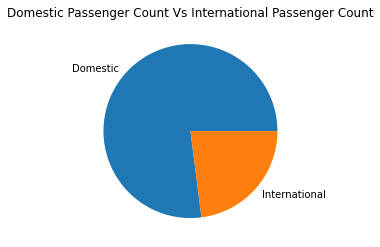

In [61]:
GEO_Summary = dt.groupby('GEO Summary').agg({"Adjusted Passenger Count":sum})
label1 = GEO_Summary.index
plt.pie(x = GEO_Summary["Adjusted Passenger Count"], labels=label1)
plt.title("Domestic Passenger Count Vs International Passenger Count")

plt.show()

Text(0, 0.5, 'Passenger Count')

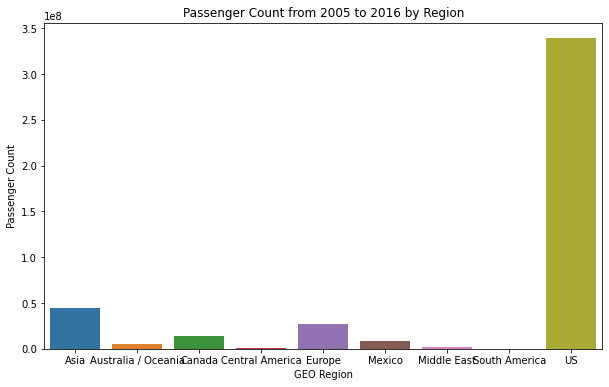

In [63]:
# Set the width and height of the figure
plt.figure(figsize = (10,6))

# Add title
plt.title("Passenger Count from 2005 to 2016 by Region")
GEO_Region = dt.groupby('GEO Region').agg({"Adjusted Passenger Count":sum})

GEO_Region

# Bar chart showing passenger count as per region
sns.barplot(x=GEO_Region.index, y=GEO_Region['Adjusted Passenger Count'] )


# Add label for vertical axis
plt.ylabel("Passenger Count")

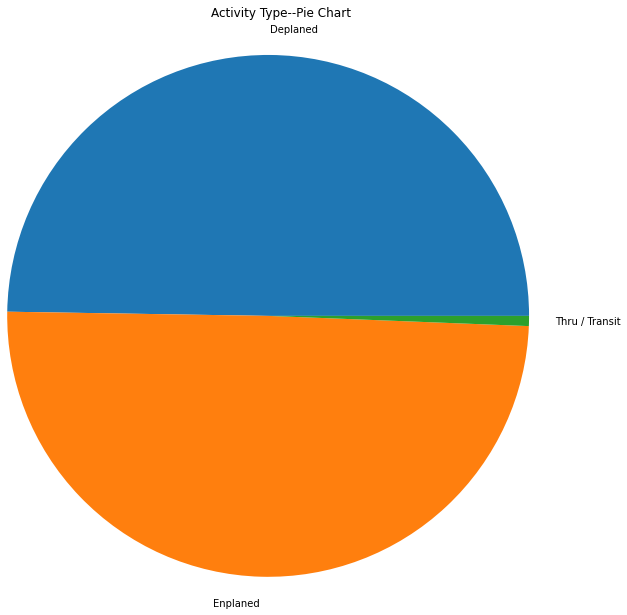

In [64]:
Activity_Type_Code=dt.groupby('Activity Type Code').agg({"Adjusted Passenger Count":sum})
labels2=Activity_Type_Code.index
plt.pie(x=Activity_Type_Code['Adjusted Passenger Count'],labels=labels2,radius=3)
plt.title("Activity Type--Pie Chart",x=0.56,y=1.85)
plt.show()

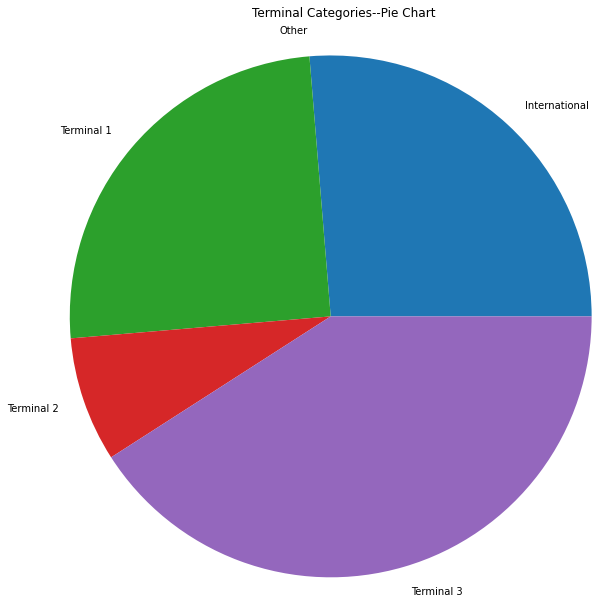

In [65]:
Terminal=dt.groupby('Terminal').agg({"Adjusted Passenger Count":sum})
Terminal
Terminal=dt.groupby('Terminal').agg({"Adjusted Passenger Count":sum})
labels3=Terminal.index
plt.pie(x=Terminal['Adjusted Passenger Count'],labels=labels3,radius=3)
plt.title("Terminal Categories--Pie Chart",x=0.56,y=1.85)
plt.show()

Text(0, 0.5, 'Passenger Count')

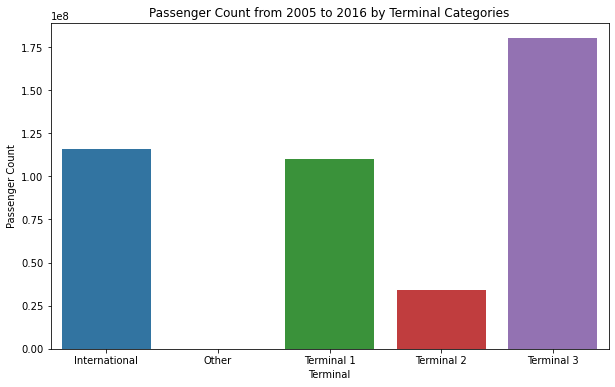

In [67]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Passenger Count from 2005 to 2016 by Terminal Categories")
Terminal=dt.groupby('Terminal').agg({"Adjusted Passenger Count":sum})
Terminal
Terminal=dt.groupby('Terminal').agg({"Adjusted Passenger Count":sum})


sns.barplot(x=Terminal.index, y=Terminal['Adjusted Passenger Count'])

plt.ylabel("Passenger Count")

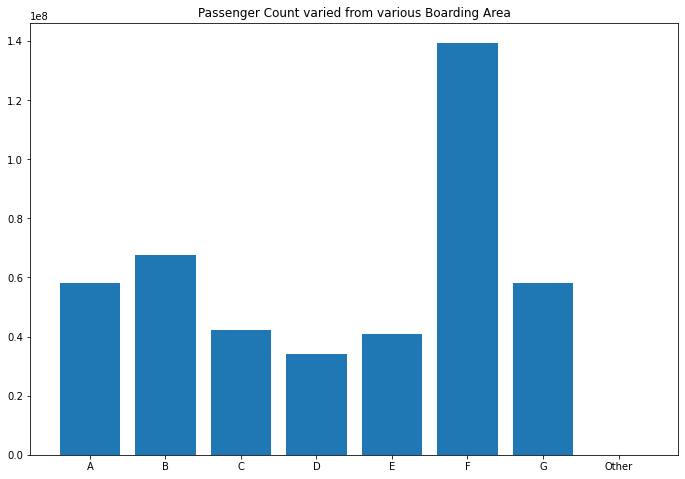

In [68]:
Boarding_Area=dt.groupby('Boarding Area').agg({"Adjusted Passenger Count":sum})
Boarding_Area
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])

x_axis=Boarding_Area.index
y_axis= Boarding_Area['Adjusted Passenger Count']

ax.bar(x_axis,y_axis)
plt.title("Passenger Count varied from various Boarding Area")
plt.show()

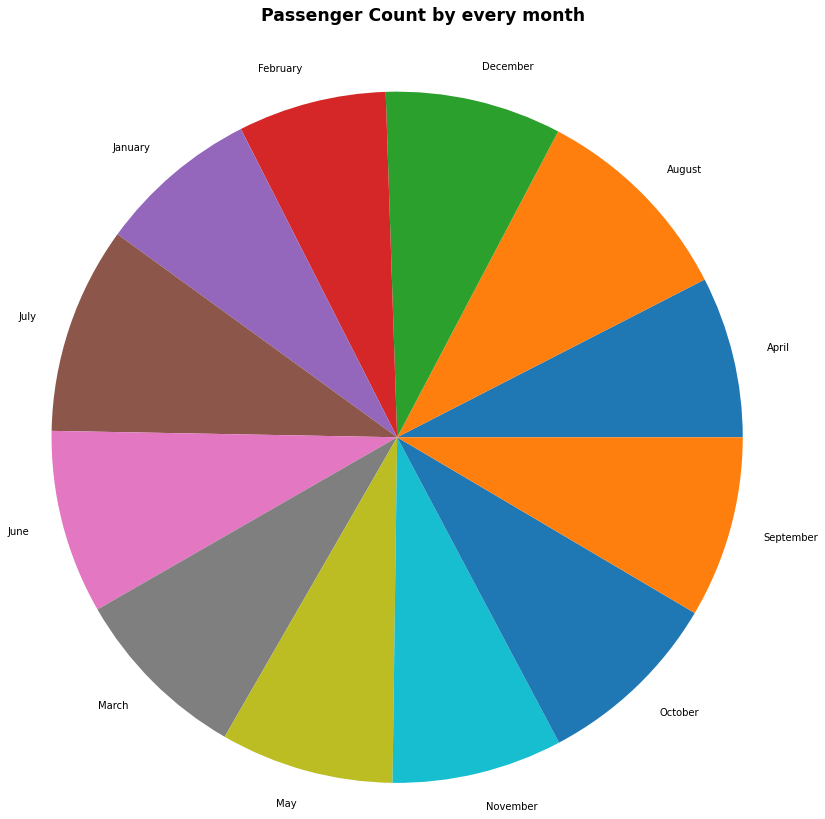

In [69]:
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])

passenger_count_month=dt.groupby('Month').agg({"Passenger Count":sum})
labels4=passenger_count_month.index
plt.pie(x=passenger_count_month['Passenger Count'],labels=labels4,radius=2)
plt.title("Passenger Count by every month",x=0.56,y=1.45,fontsize='xx-large',fontweight='heavy')
plt.show()

Text(0, 0.5, 'Passenger Count by Month')

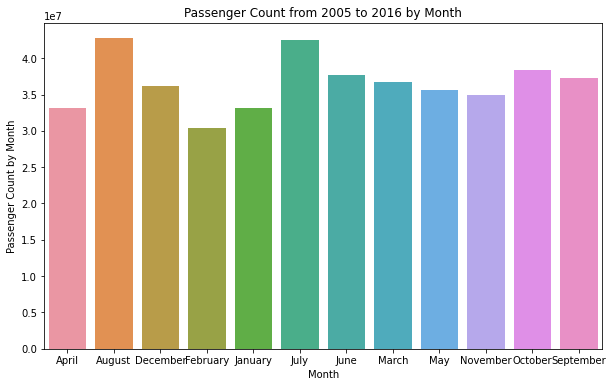

In [70]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Passenger Count from 2005 to 2016 by Month")
passenger_count_month=dt.groupby('Month').agg({"Passenger Count":sum})


sns.barplot(x=passenger_count_month.index, y=passenger_count_month['Passenger Count'])

# Add label for vertical axis
plt.ylabel("Passenger Count by Month")

In [71]:
dt.info()
dt["Published Airline"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        15007 non-null  int64 
 1   Activity Period              15007 non-null  int64 
 2   Operating Airline            15007 non-null  object
 3   Operating Airline IATA Code  14953 non-null  object
 4   Published Airline            15007 non-null  object
 5   Published Airline IATA Code  14953 non-null  object
 6   GEO Summary                  15007 non-null  object
 7   GEO Region                   15007 non-null  object
 8   Activity Type Code           15007 non-null  object
 9   Price Category Code          15007 non-null  object
 10  Terminal                     15007 non-null  object
 11  Boarding Area                15007 non-null  object
 12  Passenger Count              15007 non-null  int64 
 13  Adjusted Activity Type Code  15

0           ATA Airlines
1           ATA Airlines
2           ATA Airlines
3            Air Canada 
4            Air Canada 
              ...       
15002     Virgin America
15003     Virgin America
15004     Virgin America
15005    Virgin Atlantic
15006    Virgin Atlantic
Name: Published Airline, Length: 15007, dtype: object

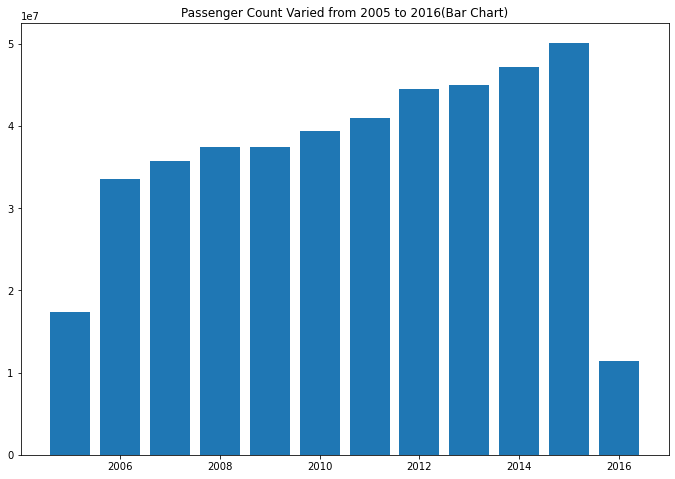

In [72]:
Year=dt.groupby('Year').agg({"Adjusted Passenger Count":sum})
fig = plt.figure()

ax = fig.add_axes([0,0,1.5,1.5])

x_axis=Year.index
y_axis= Year['Adjusted Passenger Count']

ax.bar(x_axis,y_axis)
plt.title("Passenger Count Varied from 2005 to 2016(Bar Chart)")
plt.show()

Text(0.5, 1.0, 'Passenger Count Varied from 2005 to 2016(Line Chart)')

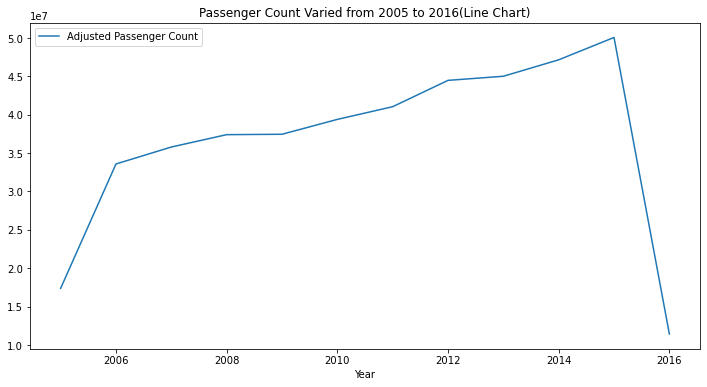

In [73]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Year) 
plt.title("Passenger Count Varied from 2005 to 2016(Line Chart)")